In [3]:
from oxdna_simulation import GenerateReplicas
from vmmc import *
import os
import scienceplots
%load_ext autoreload
%autoreload 2

In [4]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
systems = ['duplex_melting']

file_dir_list = [f'{path}/{sys}' for sys in systems]
sim_dir_list = [f'{file_dir}/vmmc_melting_replicas/vmmc_melting_rep' for sys, file_dir in zip(systems, file_dir_list)]

n_replicas = 40
vmmc_replica_generator = VmmcReplicas()

vmmc_replica_generator.multisystem_replica(
    systems,
    n_replicas,
    file_dir_list,
    sim_dir_list
)
vmmc_sim_list = vmmc_replica_generator.sim_list
queue_of_simulations = vmmc_replica_generator.queue_of_sims

p1 = '15,14,13,12,11,10,9,8'
p2 = '0,1,2,3,4,5,6,7'
pre_defined_weights = [8, 16204, 1882.94, 359.746, 52.5898, 15.0591, 7.21252, 2.2498, 2.89783]

sim_parameters = {'T':'52C', 'steps':'1e9','print_energy_every': '1e5','print_conf_interval':'1e6'}

In [46]:
for _ in range(n_replicas):
    vmmc = queue_of_simulations.get()
    vmmc.build(p1, p2, pre_defined_weights=pre_defined_weights, clean_build='force')
    vmmc.input_file(sim_parameters)
    vmmc.build_com_hb_observable(p1, p2)

In [20]:
for vmmc in vmmc_sim_list:
    vmmc.oxpy_run.run(continue_run=1e9)

Running: vmmc_melting_rep_0
Running: vmmc_melting_rep_1
Running: vmmc_melting_rep_2
Running: vmmc_melting_rep_3
Running: vmmc_melting_rep_4
Running: vmmc_melting_rep_5
Running: vmmc_melting_rep_6
Running: vmmc_melting_rep_7
Running: vmmc_melting_rep_8
Running: vmmc_melting_rep_9
Running: vmmc_melting_rep_10
Running: vmmc_melting_rep_11
Running: vmmc_melting_rep_12
Running: vmmc_melting_rep_13
Running: vmmc_melting_rep_14
Running: vmmc_melting_rep_15
Running: vmmc_melting_rep_16
Running: vmmc_melting_rep_17
Running: vmmc_melting_rep_18
Running: vmmc_melting_rep_19
Running: vmmc_melting_rep_20
Running: vmmc_melting_rep_21
Running: vmmc_melting_rep_22
Running: vmmc_melting_rep_23
Running: vmmc_melting_rep_24
Running: vmmc_melting_rep_25
Running: vmmc_melting_rep_26
Running: vmmc_melting_rep_27
Running: vmmc_melting_rep_28
Running: vmmc_melting_rep_29
Running: vmmc_melting_rep_30
Running: vmmc_melting_rep_31
Running: vmmc_melting_rep_32
Running: vmmc_melting_rep_33
Running: vmmc_melting_re

In [21]:
for vmmc in vmmc_sim_list:
    vmmc.oxpy_run.process.terminate()

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 55.049 KB written to files
	  1.383 KB written to stdout/stderr
	For a total of 0.000494 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 31.311 KB written to files
	849.000  B written to stdout/stderr
	For a total of 0.000216 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 57.945 KB written to files
	  1.498 KB written to stdout/stderr
	For a total of 0.000491 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 59.741 KB written to files
	  1.556 KB written to stdout/stderr
	For a total of 0.000488 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 30.290 KB written to files
	782.000  B written to stdout/stderr
	For a total of 0.000213 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 27.448 KB written to files
	716.000  B written to stdout/stderr
	For a total of 0

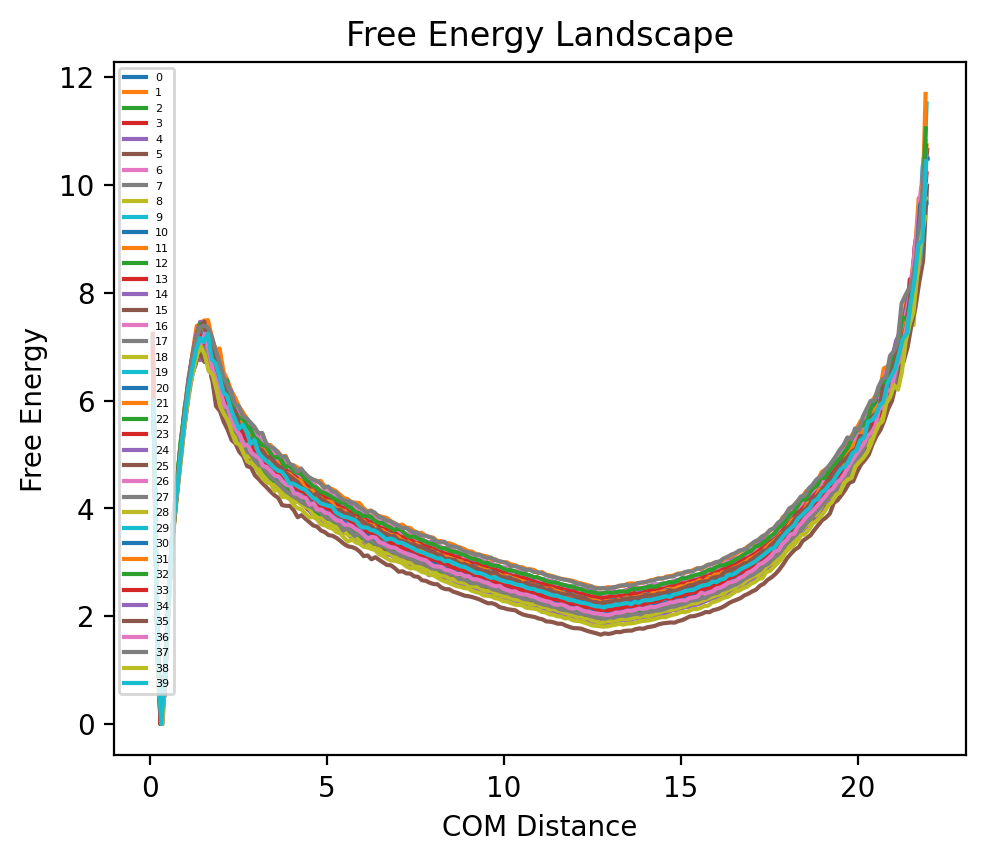

In [19]:
fig, ax = plt.subplots(dpi=200, figsize=(5.5, 4.5))
for vmmc in vmmc_sim_list:
    try:
        label = vmmc.sim_dir.split('_')[-1]
        vmmc.analysis.plot_weighted_histogram(n_bins=200, ax=ax, label=label)
        # ax.set_xlim(-0.2,8)
        # ax.set_ylim(-0.2,12)
    except:
        print('hello')
plt.legend(fontsize=4)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
7
No non-zero minimum value found.
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan n

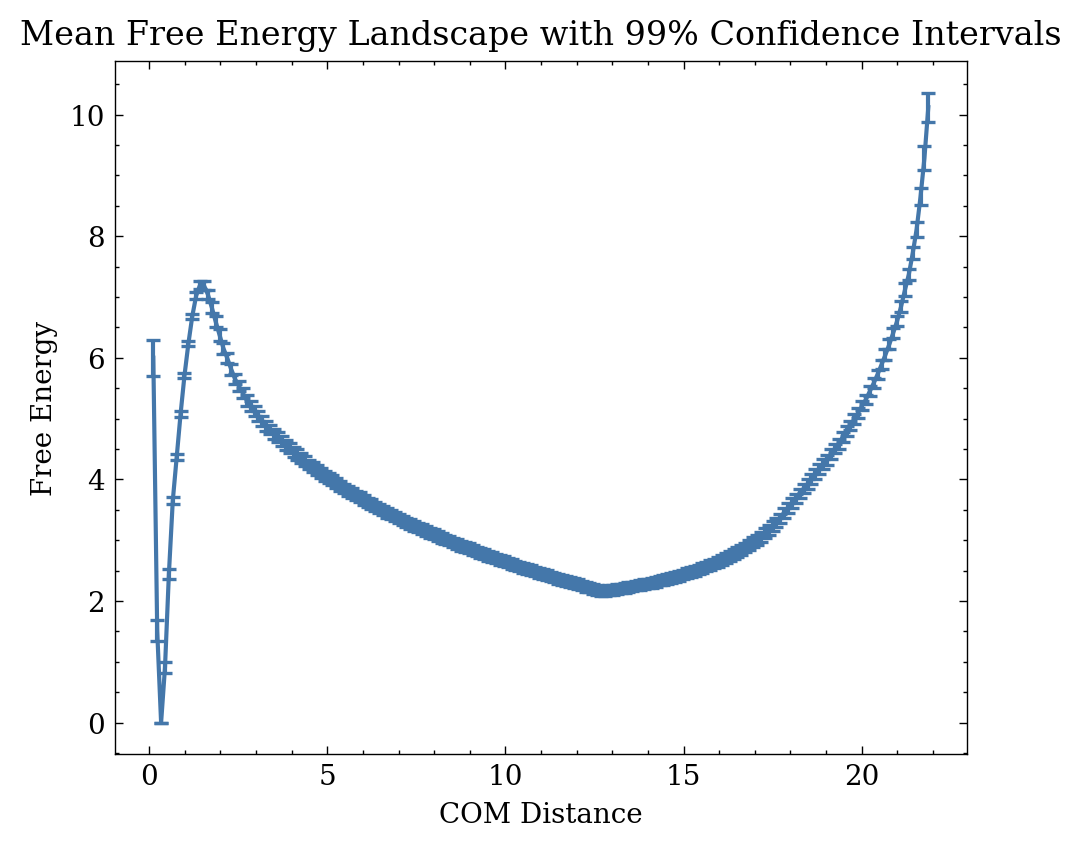

In [20]:
with plt.style.context(['science', 'no-latex', 'bright']):
    fig, ax = plt.subplots(dpi=200, figsize=(5.5, 4.5))
    vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=200, ax=ax, confidence_level=0.99)
    # ax.set_xlim(-0.1,8)
    # plt.ylim(-0.1,9)

In [25]:
vmmc_sim_list[12].analysis.view_last()

In [2]:
for vmmc in vmmc_sim_list:
    vmmc.analysis.read_vmmc_op_data()

NameError: name 'vmmc_sim_list' is not defined

In [21]:
for vmmc in vmmc_sim_list:
    print(vmmc.simulation_time)

311000000
350000000
360000000
307000000
336000000
330000000
366000000
351000000
313000000
327000000
332000000
328000000
344000000
348000000
365000000
335000000
343000000
315000000
314000000
343000000
312000000
345000000
310000000
337000000
361000000
314000000
341000000
368000000
318000000
347000000
340000000
343000000
330000000
353000000
312000000
335000000
362000000
313000000
325000000
355000000


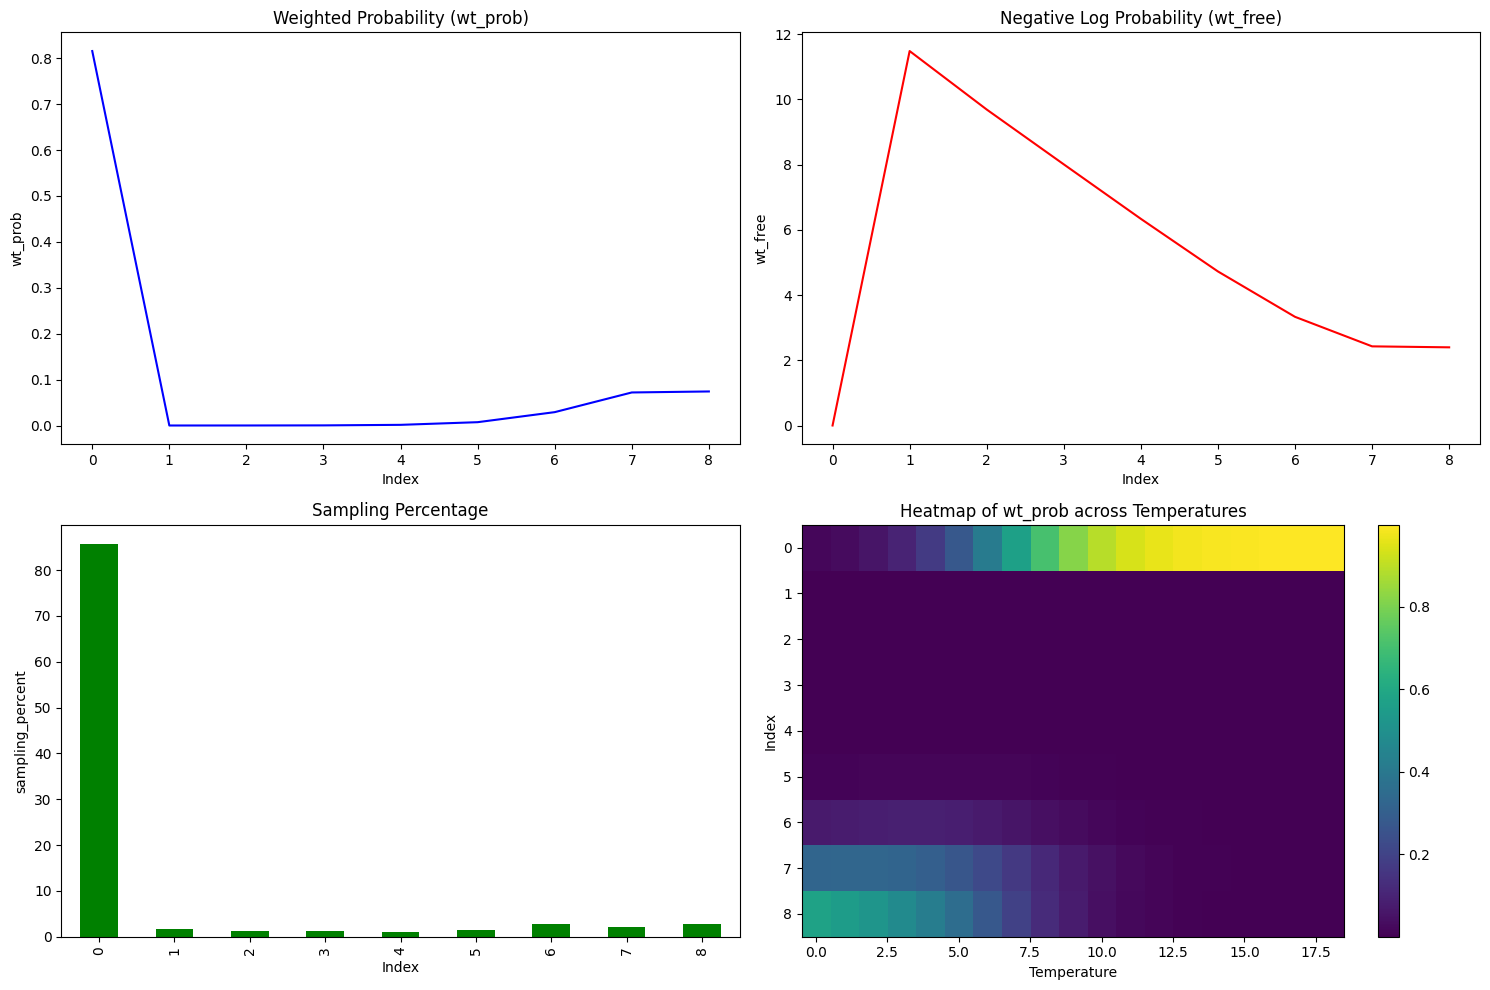

Estimated Melting Temperature (Tm) = 44.86610087300237 °C


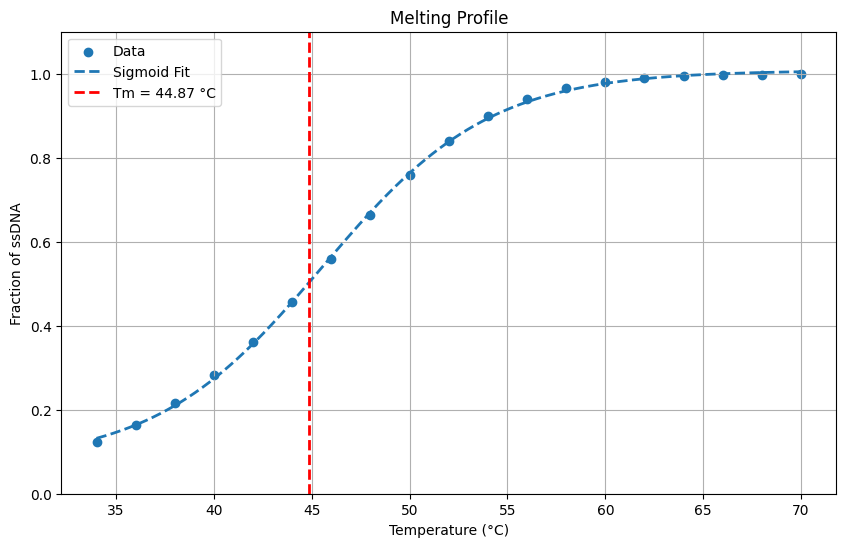

In [5]:
vmmc_sim_list[33].analysis.last_hist_analysis()

In [24]:
vmmc_sim_list[12].analysis.read_vmmc_op_data()
vmmc_sim_list[12].vmmc_df

,h_bonds,unwt_occ,wt_occ,wt_occ_34.0C,wt_occ_36.0C,wt_occ_38.0C,wt_occ_40.0C,wt_occ_42.0C,wt_occ_44.0C,wt_occ_46.0C,...,wt_occ_52.0C,wt_occ_54.0C,wt_occ_56.0C,wt_occ_58.0C,wt_occ_60.0C,wt_occ_62.0C,wt_occ_64.0C,wt_occ_66.0C,wt_occ_68.0C,wt_occ_70.0C
0,0.0,1.414570e+10,1.768210e+09,7.735210e+11,3.614950e+11,1.727220e+11,8.434300e+10,4.207740e+10,2.143780e+10,1.114990e+10,...,1.768210e+09,994657000.0,5.699750e+08,3.325730e+08,1.975020e+08,1.193190e+08,7.329940e+07,4.576580e+07,2.902880e+07,1.869650e+07
1,1.0,2.114760e+08,1.305090e+04,1.201100e+07,5.101480e+06,2.224860e+06,9.953620e+05,4.564080e+05,2.143260e+05,1.030000e+05,...,1.305090e+04,6838.2,3.656460e+03,1.994290e+03,1.108980e+03,6.284330e+02,3.627410e+02,2.131710e+02,1.274810e+02,7.754110e+01
2,2.0,1.454590e+08,7.725110e+04,1.821170e+08,7.026530e+07,2.775570e+07,1.121940e+07,4.638430e+06,1.960430e+06,8.466400e+05,...,7.725110e+04,36198.7,1.729210e+04,8.417420e+03,4.173480e+03,2.106790e+03,1.082350e+03,5.656600e+02,3.006170e+02,1.623930e+02
3,3.0,1.575970e+08,4.380780e+05,2.346100e+09,8.279700e+08,2.989050e+08,1.103450e+08,4.164220e+07,1.605910e+07,6.326620e+06,...,4.380780e+05,187282.0,8.164210e+04,3.627750e+04,1.642470e+04,7.573910e+03,3.555780e+03,1.698890e+03,8.257280e+02,4.081080e+02
4,4.0,1.272810e+08,2.420250e+06,3.003430e+10,9.664750e+09,3.180580e+09,1.070070e+09,3.679260e+08,1.292400e+08,4.636330e+07,...,2.420250e+06,941262.0,3.732110e+05,1.508130e+05,6.208910e+04,2.603310e+04,1.111260e+04,4.827590e+03,2.133580e+03,9.589360e+02
5,5.0,1.874710e+08,1.244900e+07,3.405820e+11,1.005030e+11,3.032190e+10,9.349610e+09,2.945360e+09,9.476270e+08,3.112710e+08,...,1.244900e+07,4427200.0,1.604600e+06,5.925190e+05,2.228350e+05,8.532140e+04,3.324900e+04,1.318250e+04,5.315720e+03,2.179350e+03
6,6.0,3.621900e+08,5.021690e+07,2.761170e+12,7.557490e+11,2.113650e+11,6.038130e+10,1.761260e+10,5.243770e+09,1.592970e+09,...,5.021690e+07,16477300.0,5.507050e+06,1.874160e+06,6.492420e+05,2.288620e+05,8.206670e+04,2.992580e+04,1.109350e+04,4.179270e+03
7,7.0,2.807170e+08,1.247740e+08,1.252650e+13,3.215490e+12,8.428590e+11,2.255200e+11,6.157060e+10,1.714580e+10,4.868310e+09,...,1.247740e+08,38156300.0,1.187660e+07,3.761530e+06,1.211820e+06,3.969870e+05,1.322040e+05,4.474100e+04,1.538270e+04,5.371470e+03
8,8.0,3.821060e+08,1.318590e+08,2.266140e+13,5.494510e+12,1.359500e+12,3.431340e+11,8.831090e+10,2.316670e+10,6.192340e+09,...,1.318590e+08,37855500.0,1.105450e+07,3.282510e+06,9.908140e+05,3.039250e+05,9.471110e+04,2.997570e+04,9.632740e+03,3.142120e+03


In [18]:
vmmc_sim_list[0].analysis.calculate_sampling_and_probabilities()

/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397:

In [19]:
vmmc_sim_list[0].statistics

,sampling_percent,wt_prob,wt_free,wt_occ_34.0C_prob,wt_occ_34.0C_free,wt_occ_36.0C_prob,wt_occ_36.0C_free,wt_occ_38.0C_prob,wt_occ_38.0C_free,wt_occ_40.0C_prob,...,wt_occ_62.0C_prob,wt_occ_62.0C_free,wt_occ_64.0C_prob,wt_occ_64.0C_free,wt_occ_66.0C_prob,wt_occ_66.0C_free,wt_occ_68.0C_prob,wt_occ_68.0C_free,wt_occ_70.0C_prob,wt_occ_70.0C_free
0,100.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,...,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,inf
2,0.0,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,...,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,inf
3,0.0,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,...,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,inf
4,0.0,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,...,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,inf
5,0.0,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,...,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,inf
6,0.0,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,...,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,inf
7,0.0,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,...,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,inf
8,0.0,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,...,0.0,inf,0.0,inf,0.0,inf,0.0,inf,0.0,inf


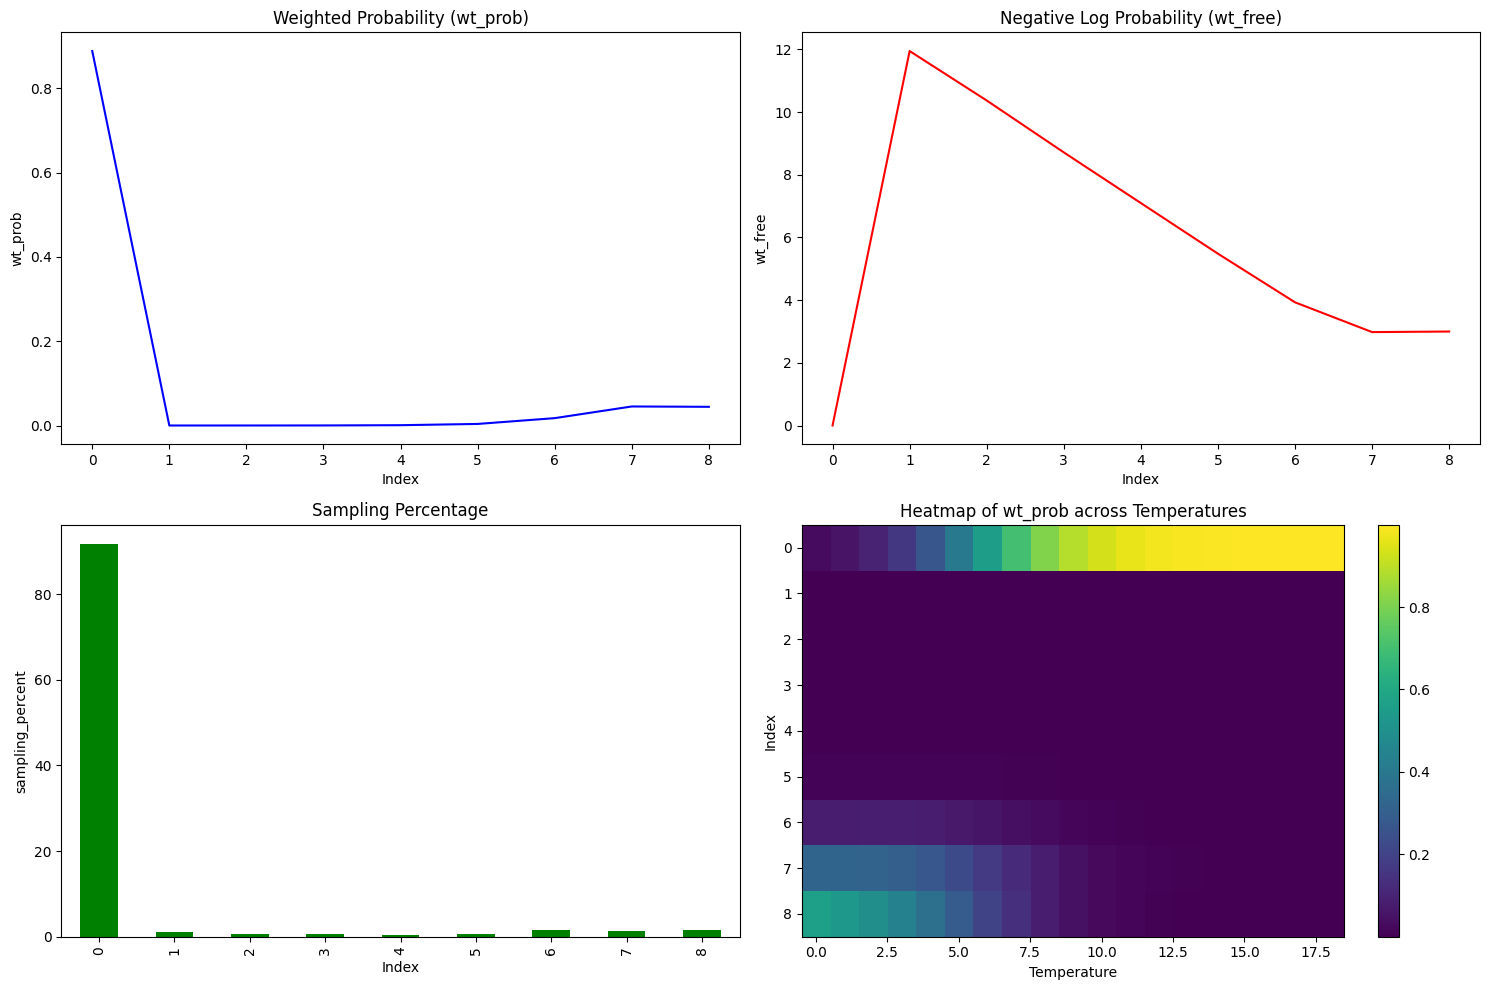

In [61]:
vmmc_sim_list[12].analysis.plot_statistics()

In [33]:
vmmc_sim_list[0].analysis.plot_melting_profiles()

AttributeError: 'VirtualMoveMonteCarlo' object has no attribute 'vmmc_df'

In [89]:
vmmc_sim_list[0].melting_profiles

,wt_occ_34.0C,wt_occ_36.0C,wt_occ_38.0C,wt_occ_40.0C,wt_occ_42.0C,wt_occ_44.0C,wt_occ_46.0C,wt_occ_48.0C,wt_occ_50.0C,wt_occ_52.0C,wt_occ_54.0C,wt_occ_56.0C,wt_occ_58.0C,wt_occ_60.0C,wt_occ_62.0C,wt_occ_64.0C,wt_occ_66.0C,wt_occ_68.0C,wt_occ_70.0C
0,10.887883,5.848202,3.144457,1.692765,0.912592,0.492837,0.266698,0.144671,0.078699,0.042953,0.023534,0.012952,0.007165,0.003987,0.002234,0.001261,0.000718,0.000413,0.000241


In [13]:
vmmc_replica_generator.replica_data

,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_0,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_1,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_2,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_3,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_4,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_5,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_6,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_7,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_8,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_9,...,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_30,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_31,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_32,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_33,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_34,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_35,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_36,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_37,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_38,/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/vmmc_melting_replicas/vmmc_melting_rep_39
0,0.000000,0.000000,0.000000,0.879504,0.000000,0.000000,0.000000,0.000000,0.852498,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,11.477968,13.301035,12.026461,9.727911,15.240454,11.689503,15.153159,12.385495,9.005894,12.202308,...,14.059048,12.672527,inf,12.826005,10.868614,14.500308,12.781255,inf,12.412909,12.656739
2,9.163279,12.106910,10.678884,7.630085,inf,10.076213,18.112321,10.643746,7.211038,9.927503,...,14.510182,11.145287,inf,10.862760,9.525233,14.442527,11.003157,inf,10.864671,10.724935
3,7.197040,11.354075,9.140233,5.849053,inf,8.421002,inf,8.890109,5.529688,8.085686,...,inf,8.903543,inf,9.262823,8.276088,inf,9.617171,inf,9.114990,8.939959
4,5.348722,inf,7.959318,4.067453,inf,6.798692,inf,7.013392,3.874805,6.506702,...,inf,6.794349,inf,7.503803,6.631894,inf,8.237921,inf,7.275849,7.294427
5,3.703073,inf,6.921258,2.390610,inf,5.231910,inf,5.179085,2.260179,4.886053,...,inf,4.926312,inf,5.754286,4.827858,inf,6.563705,inf,5.393226,5.698594
6,2.233090,inf,5.764711,0.955134,inf,3.955136,inf,3.870558,0.890640,3.619726,...,inf,3.469334,inf,4.433451,3.400504,inf,5.551460,inf,3.912711,4.135889
7,1.396179,inf,5.080350,0.038729,inf,3.099757,inf,3.169050,0.019230,2.855780,...,inf,2.609850,inf,3.607698,2.584716,inf,5.048671,inf,2.909332,3.068424
8,1.344903,inf,4.951556,0.000000,inf,3.109017,inf,3.305020,0.000000,3.099857,...,inf,2.420235,inf,3.566116,2.819990,inf,5.539124,inf,2.831206,2.894890


/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlsample/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397:

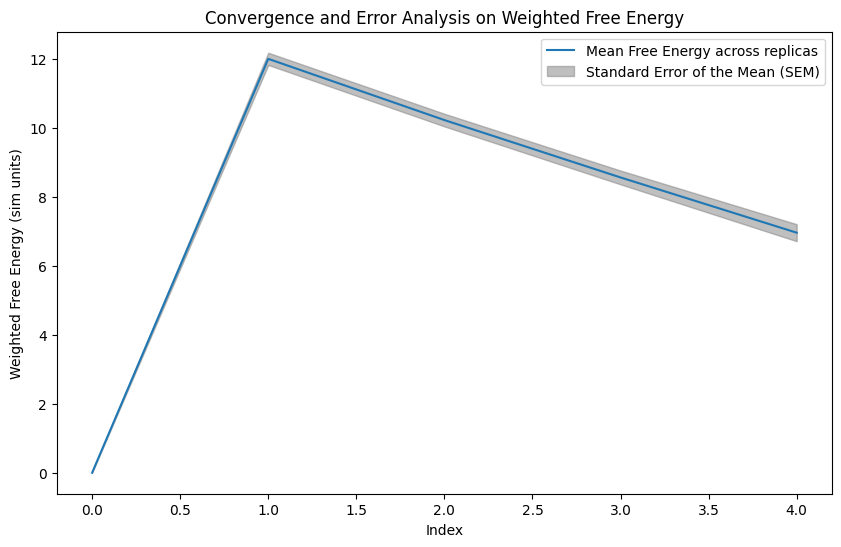

In [90]:
vmmc_replica_generator.collect_replica_data()
vmmc_replica_generator.analyze_convergence_and_estimate_errors()

In [5]:
for vmmc in vmmc_sim_list:
    vmmc.analysis.read_vmmc_op_data()
    print(vmmc.vmmc_df['unwt_occ'][0])

1970460000.0
2950270000.0
3139840000.0
2672990000.0
2615410000.0
2648830000.0
3273830000.0
2871070000.0
2573120000.0
2318330000.0
2460930000.0
2672650000.0
2851210000.0
2916930000.0
3235910000.0
2960010000.0
2974560000.0
2146150000.0
1945940000.0
2532020000.0
2417070000.0
3034110000.0
2346990000.0
2447680000.0
3075620000.0
2190140000.0
3037720000.0
3443750000.0
2321800000.0
3066790000.0
2650850000.0
2403620000.0
2483350000.0
2983240000.0
2445720000.0
2725870000.0
3059080000.0
2146140000.0
2345710000.0
2823600000.0


In [21]:
vmmc_sim_list[0].sim_files.parse_current_files()

In [22]:
vmmc_sim_list[0].sim_files.file_list

['input',
 'input.json',
 'trajectory.dat',
 'wfile.txt',
 'hb_observable.txt',
 'observables.json',
 'last_hist.dat',
 'last_conf.dat',
 'energy.dat',
 'traj_hist.dat',
 'com_distance.txt',
 'duplex_box_30.dat',
 'vmmc_op.txt',
 'hb_list.txt',
 'duplex_box_30.top']